In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=805b9a94e2fe1ddbaf28830641ee3c1f


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=805b9a94e2fe1ddbaf28830641ee3c1f&q=Boston


In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"base":"stations","main":{"temp":74.35,"feels_like":73.65,"temp_min":69.8,"temp_max":77,"pressure":1012,"humidity":46},"visibility":10000,"wind":{"speed":11.5,"deg":110},"clouds":{"all":40},"dt":1618078387,"sys":{"type":1,"id":3486,"country":"US","sunrise":1618049451,"sunset":1618096778},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [13]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 74.35,
  'feels_like': 73.65,
  'temp_min': 69.8,
  'temp_max': 77,
  'pressure': 1012,
  'humidity': 46},
 'visibility': 10000,
 'wind': {'speed': 11.5, 'deg': 110},
 'clouds': {'all': 40},
 'dt': 1618078387,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1618049451,
  'sunset': 1618096778},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=805b9a94e2fe1ddbaf28830641ee3c1f&q=Bston


In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 74.35,
  'feels_like': 73.65,
  'temp_min': 69.8,
  'temp_max': 77,
  'pressure': 1012,
  'humidity': 46},
 'visibility': 10000,
 'wind': {'speed': 11.5, 'deg': 110},
 'clouds': {'all': 40},
 'dt': 1618078387,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1618049451,
  'sunset': 1618096778},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Get the JSON data.
boston_data = city_weather.json()

In [19]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 77 46 40 11.5


In [20]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [21]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | nantucket
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | pocinhos
Processing Record 5 of Set 1 | san policarpo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | zabol
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | takapau
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | hofn
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | vanavara
Processing Record 16 of Set 1 | kaitangata
Processing Record 17 of Set 1 | key largo
Processing Record 18 of Set 1 | alice springs
Processing Record 19 of Set 1 | rio gallegos
Processing Record 20 of Set 1 | caravelas
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | tor

Processing Record 39 of Set 4 | flin flon
Processing Record 40 of Set 4 | namatanai
Processing Record 41 of Set 4 | wajir
Processing Record 42 of Set 4 | goderich
Processing Record 43 of Set 4 | les cayes
Processing Record 44 of Set 4 | port augusta
Processing Record 45 of Set 4 | moshi
Processing Record 46 of Set 4 | amderma
City not found. Skipping...
Processing Record 47 of Set 4 | solnechnyy
Processing Record 48 of Set 4 | manzanillo
Processing Record 49 of Set 4 | mbanza-ngungu
Processing Record 50 of Set 4 | half moon bay
Processing Record 1 of Set 5 | bengkulu
Processing Record 2 of Set 5 | flinders
Processing Record 3 of Set 5 | palmares do sul
Processing Record 4 of Set 5 | paragominas
Processing Record 5 of Set 5 | korla
Processing Record 6 of Set 5 | sidrolandia
Processing Record 7 of Set 5 | morondava
Processing Record 8 of Set 5 | motaeni
Processing Record 9 of Set 5 | umm kaddadah
Processing Record 10 of Set 5 | havre-saint-pierre
Processing Record 11 of Set 5 | waipawa
P

Processing Record 25 of Set 8 | the valley
Processing Record 26 of Set 8 | zakamensk
Processing Record 27 of Set 8 | chapais
Processing Record 28 of Set 8 | bachaquero
Processing Record 29 of Set 8 | olafsvik
Processing Record 30 of Set 8 | bandipur
Processing Record 31 of Set 8 | sechura
Processing Record 32 of Set 8 | pacifica
Processing Record 33 of Set 8 | vila velha
Processing Record 34 of Set 8 | ust-bolsheretsk
City not found. Skipping...
Processing Record 35 of Set 8 | edinet
Processing Record 36 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 37 of Set 8 | katherine
Processing Record 38 of Set 8 | asau
Processing Record 39 of Set 8 | yumen
Processing Record 40 of Set 8 | mumford
Processing Record 41 of Set 8 | katsuura
Processing Record 42 of Set 8 | carbonia
Processing Record 43 of Set 8 | ixtapa
Processing Record 44 of Set 8 | wilmington
Processing Record 45 of Set 8 | deep river
Processing Record 46 of Set 8 | paamiut
Processing Record 47 of Set 8 | caraz


Processing Record 13 of Set 12 | jaramana
City not found. Skipping...
Processing Record 14 of Set 12 | zhigansk
Processing Record 15 of Set 12 | karaton
Processing Record 16 of Set 12 | lampa
Processing Record 17 of Set 12 | rodeo
Processing Record 18 of Set 12 | kalabo
Processing Record 19 of Set 12 | turukhansk
Processing Record 20 of Set 12 | takoradi
Processing Record 21 of Set 12 | sangar
Processing Record 22 of Set 12 | castleisland
Processing Record 23 of Set 12 | tulum
Processing Record 24 of Set 12 | dharchula
Processing Record 25 of Set 12 | foggia
Processing Record 26 of Set 12 | meadow lake
Processing Record 27 of Set 12 | vangaindrano
Processing Record 28 of Set 12 | malanje
Processing Record 29 of Set 12 | sudak
Processing Record 30 of Set 12 | rakiv lis
Processing Record 31 of Set 12 | teluknaga
Processing Record 32 of Set 12 | hervey bay
Processing Record 33 of Set 12 | kampene
Processing Record 34 of Set 12 | touros
Processing Record 35 of Set 12 | pimenteiras
Processi

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,64.99,64,100,5.99,AU,2021-04-10 18:16:56
1,Nantucket,41.2835,-70.0995,53.01,81,1,12.66,US,2021-04-10 18:14:59
2,Mataura,-46.1927,168.8643,57.00,93,96,5.01,NZ,2021-04-10 18:16:56
3,Pocinhos,-7.0767,-36.0611,75.20,88,75,14.97,BR,2021-04-10 18:16:57
4,San Policarpo,12.1791,125.5072,79.21,80,98,10.63,PH,2021-04-10 18:16:57
5,Rikitea,-23.1203,-134.9692,78.75,71,2,9.51,PF,2021-04-10 18:16:57
6,Zabol,32.2500,67.2500,62.37,17,41,7.27,AF,2021-04-10 18:16:58
7,Saint-Philippe,-21.3585,55.7679,80.60,69,90,11.12,RE,2021-04-10 18:16:58
8,Takapau,-40.0333,176.3500,59.00,94,64,1.86,NZ,2021-04-10 18:16:58
9,Hilo,19.7297,-155.0900,71.60,68,1,3.44,US,2021-04-10 18:15:24


In [23]:
new_column_order = ["City", "Cloudiness", "Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,100,AU,2021-04-10 18:16:56,64,-33.6500,115.3333,64.99,5.99
1,Nantucket,1,US,2021-04-10 18:14:59,81,41.2835,-70.0995,53.01,12.66
2,Mataura,96,NZ,2021-04-10 18:16:56,93,-46.1927,168.8643,57.00,5.01
3,Pocinhos,75,BR,2021-04-10 18:16:57,88,-7.0767,-36.0611,75.20,14.97
4,San Policarpo,98,PH,2021-04-10 18:16:57,80,12.1791,125.5072,79.21,10.63
...,...,...,...,...,...,...,...,...,...
563,Koutsouras,0,GR,2021-04-10 18:20:13,51,35.0339,25.9469,52.92,18.39
564,Litovko,65,RU,2021-04-10 18:20:13,44,49.2361,135.1742,44.56,12.17
565,Tuntum,65,BR,2021-04-10 18:20:13,58,-5.2581,-44.6489,87.66,6.58
566,Sao Miguel Do Araguaia,7,BR,2021-04-10 18:20:14,51,-13.2750,-50.1628,86.56,4.83


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1618078814.88611

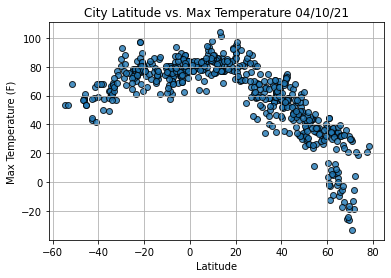

In [46]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

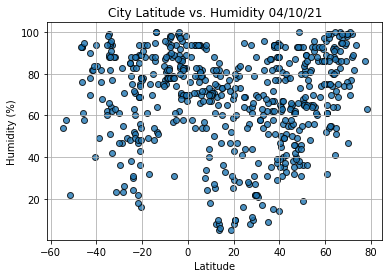

In [45]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

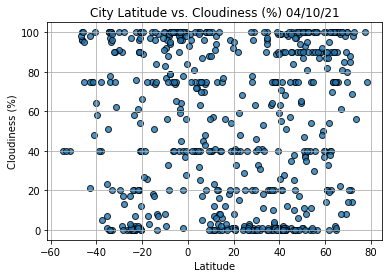

In [44]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

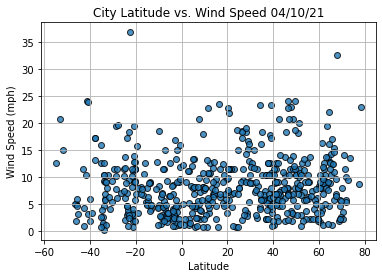

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
folder = "weather_data"
f_name = "fig4.png"
plt.savefig(os.path.join(folder,f_name))
# Show plot.
plt.show()

In [31]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [32]:
index13 = city_data_df.loc[13]
index13

City                      Ushuaia
Lat                         -54.8
Lng                         -68.3
Max Temp                     53.6
Humidity                       54
Cloudiness                     40
Wind Speed                  12.66
Country                        AR
Date          2021-04-10 18:17:00
Name: 13, dtype: object

In [33]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
563     True
564     True
565    False
566    False
567     True
Name: Lat, Length: 568, dtype: bool

In [34]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Nantucket,41.2835,-70.0995,53.01,81,1,12.66,US,2021-04-10 18:14:59
4,San Policarpo,12.1791,125.5072,79.21,80,98,10.63,PH,2021-04-10 18:16:57
6,Zabol,32.2500,67.2500,62.37,17,41,7.27,AF,2021-04-10 18:16:58
9,Hilo,19.7297,-155.0900,71.60,68,1,3.44,US,2021-04-10 18:15:24
10,Hofn,64.2539,-15.2082,33.42,41,2,4.70,IS,2021-04-10 18:16:59


In [35]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

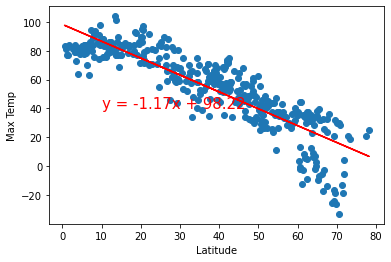

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

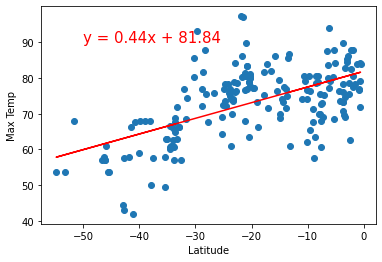

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

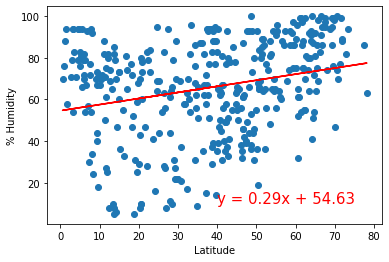

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

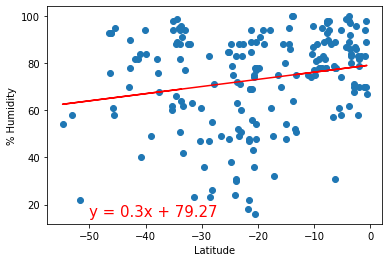

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

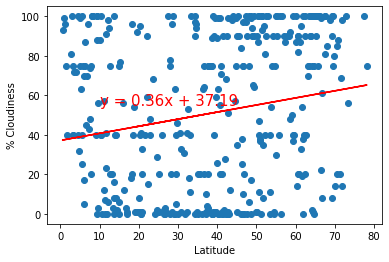

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(10,55))

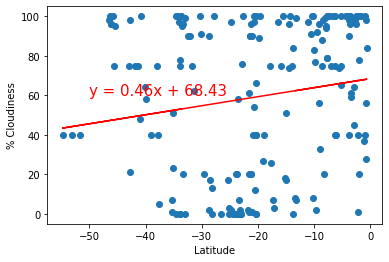

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

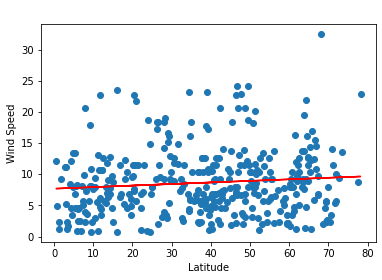

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

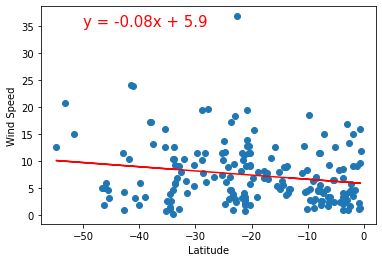

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))